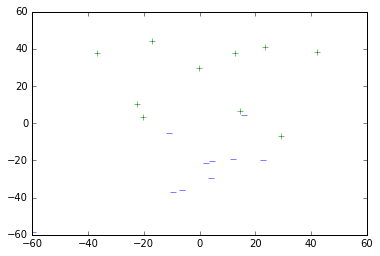

In [18]:
#reading our 2D data, and centering by deleting the average:

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
city_list = list()
forest_list = list()

for i in range(10):
    img = mpimg.imread('../data/beach' + str(i) + '.jpg')
    forest_list.append([img[:,:,0].sum() / img[:,:,0].size, img[:,:,2].sum() / img[:,:,2].size])

    img = mpimg.imread('../data/urban_z' + str(i) + '.jpg')
    city_list.append([img[:,:,0].sum() / img[:,:,0].size, img[:,:,2].sum() / img[:,:,2].size])

average = np.mean(city_list + forest_list, axis=0)
city_array_centered = np.array(city_list)-average   
forest_array_centered = np.array(forest_list)-average  
plt.plot(forest_array_centered[:,0], forest_array_centered[:,1], 'g+')
plt.plot(city_array_centered[:,0], city_array_centered[:,1], 'b_')



In [19]:
from IPython import display
import time 

def plot_seperating_hyperlane(w):
    print w
    w = w / np.linalg.norm(w)
    t = np.arange(-60.0, 80.0, 10.0)
    plt.plot(w[1]*t, -w[0]*t, 'k--', lw=2)
    plt.plot(forest_array_centered[:,0], forest_array_centered[:,1], 'g+')
    plt.plot(city_array_centered[:,0], city_array_centered[:,1], 'b_')
    plt.show()
    display.clear_output(wait=True)
    time.sleep(0.5)

In [30]:
x = np.row_stack((city_array_centered, forest_array_centered))
x

array([[  4.16420644, -29.28359994],
       [-10.9717878 ,  -5.09281548],
       [ -9.68294196, -37.0074162 ],
       [  2.12390365, -21.34294259],
       [-59.5938679 , -58.39672593],
       [ 16.04880519,   4.34787772],
       [ -6.34738214, -36.04609045],
       [ 22.65978642, -20.02869641],
       [ 12.0734715 , -19.11902208],
       [  4.52119826, -20.39387068],
       [ -0.39069664,  29.92935773],
       [ 14.46575882,   6.71294531],
       [ 29.15738326,  -6.91769552],
       [-16.95501209,  44.2325775 ],
       [ 12.81008072,  37.60472872],
       [-20.25048175,   3.41112911],
       [-22.56895554,  10.33736657],
       [ 23.37922688,  40.89461153],
       [ 41.97120282,  38.48868584],
       [-36.61389811,  37.66959523]])

In [31]:
y = np.array([-1]*10 + [1]*10)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [32]:
total_examples = len(y)
total_examples

20

In [33]:
def perceptron(x, y):
    w = np.zeros(2)
    total_iterations = 10
    for iteration in range(total_iterations):
        for i in range(total_examples):
            if np.dot(x[i], w)*y[i] <= 0:
                w = w + x[i]*y[i]
                plot_seperating_hyperlane(w)
    return w

[ -1.82899111  20.38731911]


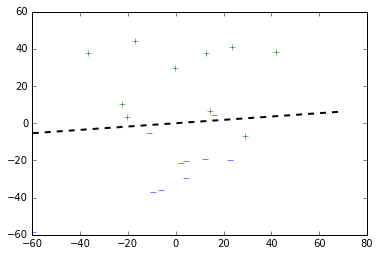

In [34]:
w = perceptron(x,y)

[ -1.82899111  20.38731911]


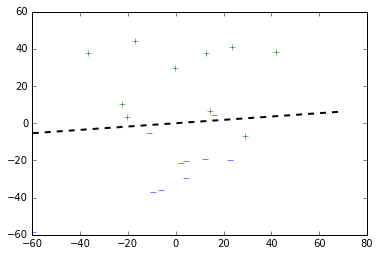

In [35]:
plot_seperating_hyperlane(w)



In [36]:
from sklearn import linear_model
classifier = linear_model.LogisticRegression()
classifier.fit(x,y)
w = classifier.coef_[0]
w / np.linalg.norm(w)

array([ 0.07992115,  0.99680119])

In [40]:
plot_seperating_hyperlane(w)
from sklearn import linear_model
classifier = linear_model.LogisticRegression()
classifier.fit(x,y)
probabilities = classifier.predict_proba(x)
probabilities.round(decimals=2)




array([[ 0.99,  0.01],
       [ 0.72,  0.28],
       [ 1.  ,  0.  ],
       [ 0.98,  0.02],
       [ 1.  ,  0.  ],
       [ 0.23,  0.77],
       [ 1.  ,  0.  ],
       [ 0.96,  0.04],
       [ 0.96,  0.04],
       [ 0.97,  0.03],
       [ 0.  ,  1.  ],
       [ 0.16,  0.84],
       [ 0.67,  0.33],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.38,  0.62],
       [ 0.14,  0.86],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.  ,  1.  ]])

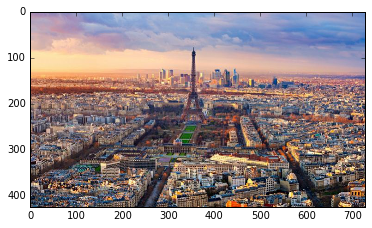

In [46]:
img = mpimg.imread('../data/urban_z7.jpg')
plt.imshow(img)

In [38]:
from sklearn import svm

classifier = svm.SVC(kernel='linear')
classifier.fit(x,y)

w = classifier.coef_[0]
w / np.linalg.norm(w)



array([ 0.09765754,  0.99522008])

[ 0.00756919  0.07713702]


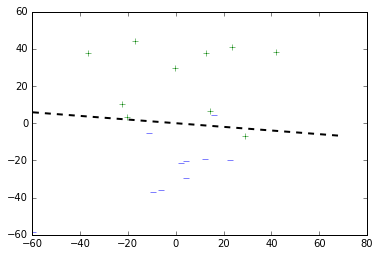

In [39]:
plot_seperating_hyperlane(w)

